In [1]:
!pip install pandas numpy scikit-learn matplotlib tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataset.csv")
df.head()

Saving dataset.csv to dataset.csv


,Source(Lat),source(Long),Destination(Lat),Destination(Long),Speed(km),Distance(km),Altimetry1,Altimetry2,Altimetry3,Altimetry4,Altimetry5,Altimetry6,Altimetry7,Altimetry8,Altimetry9,Altimetry10,Time(minnutes),Soc
0,12.9830,80.2594,147.5358,214.8122,70,137.0,5.9826,4.0188,8.96590,3.4065,14.25980,11.6881,22.7474,19.46530,7.0822,11.01580,159,52.0
1,13.0827,80.2707,147.4587,214.6467,68,381.0,4.3615,6.9664,5.53170,3.6215,5.87051,4.6833,4.9347,4.86152,3.2392,5.56110,433,68.0
2,13.0827,80.2707,147.4587,214.6467,75,766.0,4.3615,11.2439,27.49690,22.0944,63.81500,78.3624,161.9935,587.22200,559.4389,534.50340,799,90.8
3,13.0827,80.2707,147.4587,214.6467,60,706.0,4.3615,11.2594,39.00680,56.5993,20.42650,41.4902,24.3435,23.14474,94.9946,53.38328,683,85.0
4,11.9401,79.4861,12.9165,79.1325,58,128.0,46.1555,69.8356,86.71276,222.6724,134.86660,153.0756,151.7442,166.89690,488.1175,213.92760,165,43.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


features = df[["Speed(km)", "Distance(km)", "Time(minnutes)",
               "Altimetry1", "Altimetry2", "Altimetry3", "Altimetry4",
               "Altimetry5", "Altimetry6", "Altimetry7", "Altimetry8",
               "Altimetry9", "Altimetry10"]]

target = df["Soc"]


scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4154.6895 - mae: 61.0653 - val_loss: 4446.1709 - val_mae: 63.2424
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4209.5942 - mae: 61.4279 - val_loss: 4365.1597 - val_mae: 62.6348
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3964.4443 - mae: 59.5074 - val_loss: 4261.5454 - val_mae: 61.8491
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3787.5261 - mae: 57.9345 - val_loss: 4132.9219 - val_mae: 60.8583
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3667.5452 - mae: 56.9100 - val_loss: 3980.2441 - val_mae: 59.6547
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3536.7585 - mae: 56.1838 - val_loss: 3803.8914 - val_mae: 58.2257
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3369.6218 - mae: 54.5112 - val_loss: 3606.7485 - val_mae: 56.5748
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3307.1340 - mae: 54.0014 - val_loss: 3393.3079 - val_mae: 54.7199
Epoch 9

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 247.5615 - mae: 11.5889 
Mean Absolute Error: 11.288516998291016
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


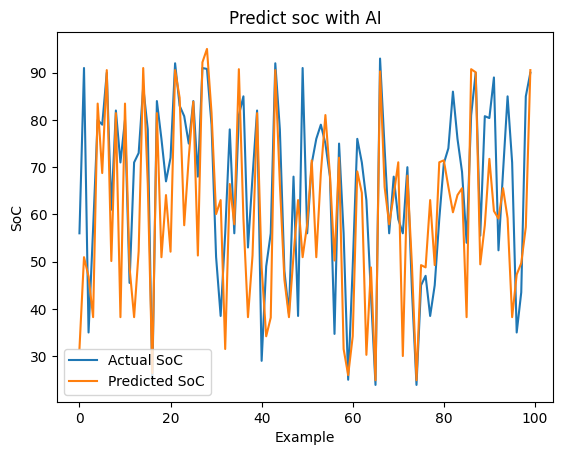

In [10]:
import matplotlib.pyplot as plt

loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

y_pred = model.predict(X_test)

plt.plot(y_test.values[:100], label='Actual SoC')
plt.plot(y_pred[:100], label='Predicted SoC')
plt.legend()
plt.title("Predict soc with AI")
plt.xlabel("Example")
plt.ylabel("SoC")
plt.show()


In [11]:
# مقدار MAE و MSE از آخرین epoch آموزش
final_mae = history.history['mae'][-1]
final_mse = history.history['loss'][-1]

print(f"MAE: {final_mae:.2f}")
print(f"MSE: {final_mse:.2f}")


MAE: 12.78
MSE: 295.40


In [13]:
predictions = model.predict(X_test).flatten()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<ipython-input-15-72c5bb95eeda>:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


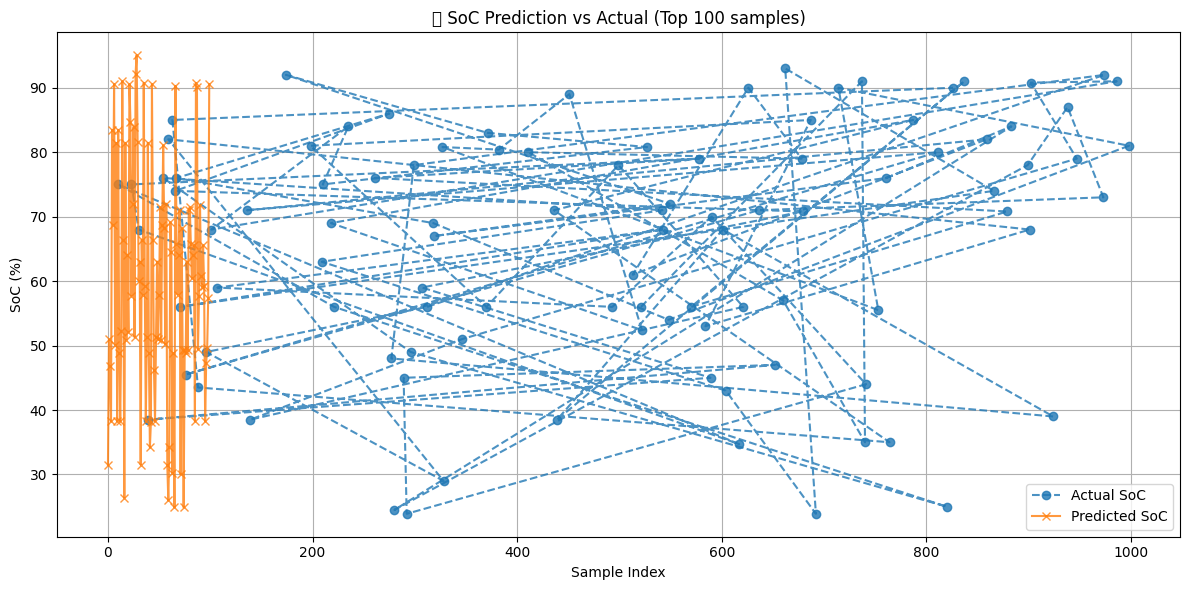

<ipython-input-15-72c5bb95eeda>:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


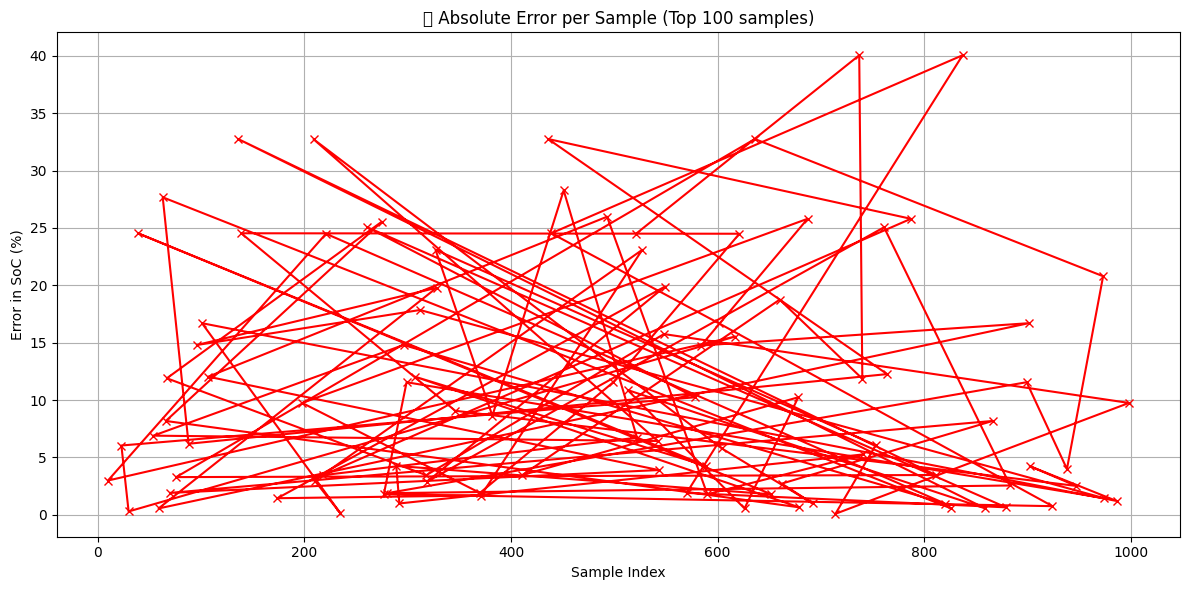

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label="Actual SoC", marker='o', linestyle='--', alpha=0.8)
plt.plot(predictions[:100], label="Predicted SoC", marker='x', linestyle='-', alpha=0.8)
plt.title("📈 SoC Prediction vs Actual (Top 100 samples)")
plt.xlabel("Sample Index")
plt.ylabel("SoC (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
errors = abs(y_test - predictions)
plt.figure(figsize=(12, 6))
plt.plot(errors[:100], color='red', marker='x')
plt.title("🔍 Absolute Error per Sample (Top 100 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Error in SoC (%)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [5]:
df.columns


Index(['Source(Lat)', 'source(Long)', 'Destination(Lat)', 'Destination(Long)',
       'Speed(km)', 'Distance(km)', 'Altimetry1', 'Altimetry2', 'Altimetry3',
       'Altimetry4', 'Altimetry5', 'Altimetry6', 'Altimetry7', 'Altimetry8',
       'Altimetry9', 'Altimetry10', 'Time(minnutes)', 'Soc'],
      dtype='object')